# Estadistica Aplicada

Sesion 23, 30 de Octubre

Jesus Adrian Cordero Hernandez 1952778

GPO 41

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

In [4]:
euro = pd.read_excel('euro_mxn.xlsx')
euro

,Date,tipo_euro
0,2018-10-29,23.002001
1,2018-11-05,22.935900
2,2018-11-12,22.970230
3,2018-11-19,23.150999
4,2018-11-26,23.081200
...,...,...
257,2023-10-02,19.224001
258,2023-10-09,18.999500
259,2023-10-16,19.316000
260,2023-10-23,19.171900


In [7]:
euro.dtypes

Date         datetime64[ns]
tipo_euro           float64
dtype: object

In [8]:
euro.isnull().sum()

Date         0
tipo_euro    0
dtype: int64

In [9]:
## index
euro = euro.set_index('Date')

In [10]:
## Frecuencia
euro = euro.asfreq('W-MON')

In [11]:
euro

,tipo_euro
Date,
2018-10-29,23.002001
2018-11-05,22.935900
2018-11-12,22.970230
2018-11-19,23.150999
2018-11-26,23.081200
...,...
2023-09-25,18.403999
2023-10-02,19.224001
2023-10-09,18.999500


In [12]:
euro.index

DatetimeIndex(['2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31',
               ...
               '2023-08-21', '2023-08-28', '2023-09-04', '2023-09-11',
               '2023-09-18', '2023-09-25', '2023-10-02', '2023-10-09',
               '2023-10-16', '2023-10-23'],
              dtype='datetime64[ns]', name='Date', length=261, freq='W-MON')

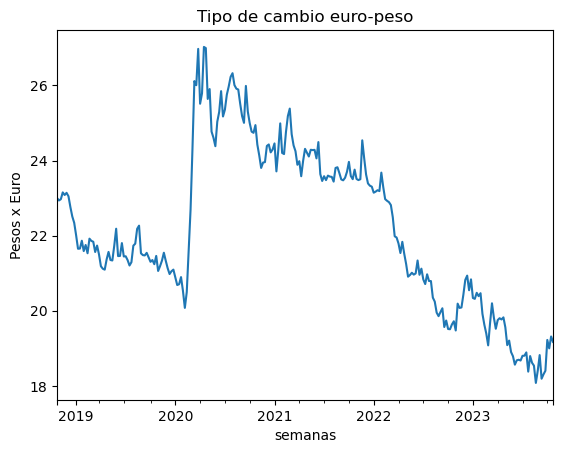

In [15]:
## Graficar
euro['tipo_euro'].plot()
plt.title('Tipo de cambio euro-peso')
plt.xlabel('semanas')
plt.ylabel('Pesos x Euro');

In [16]:
## prueba de raiz unitaria
prueba_adf = adfuller(euro['tipo_euro'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.69

Como el pvalue es de .69 no rechazamos ho lo que significa que el euro es una serie no estacionaria

In [17]:
## Primeras dif
euro['euro_diff'] = euro['tipo_euro'].diff()

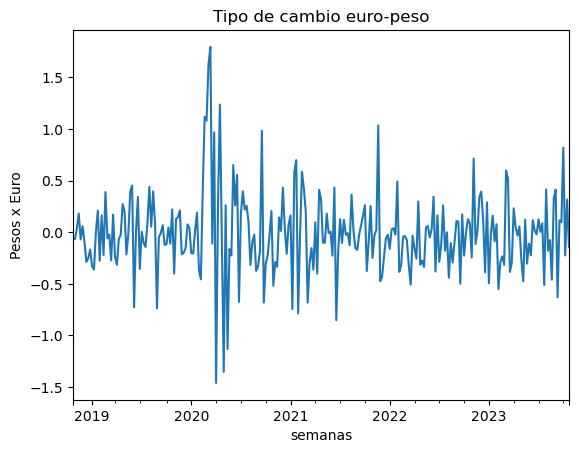

In [18]:
euro['euro_diff'].plot()
plt.title('Tipo de cambio euro-peso')
plt.xlabel('semanas')
plt.ylabel('Pesos x Euro');

In [21]:
## prueba de raiz unitaria
prueba_adf1 = adfuller(euro['euro_diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos ho, las primeras diferencias del euro son un proceso estacionario

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


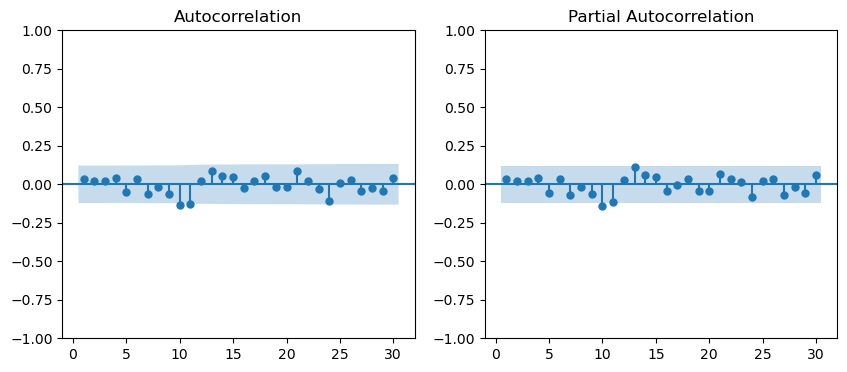

In [22]:
## Graficas de correlacion 
ig, ax = plt.subplots(1,2, figsize=(10,4))
## 1er
plot_acf(euro['euro_diff'].dropna(),zero=False,lags=30,ax=ax[0])
## 2da
plot_pacf(euro['euro_diff'].dropna(),zero=False,lags=30,ax=ax[1])
plt.show()

Esta serie no tiene componente estacional

In [25]:
## Determinar el orden del proceso 
arimaorder_aic = pm.auto_arima(euro['tipo_euro'], start_p=1,start_q=1,max_p=7,_max_q=7, information_criterion='aic')
arimaorder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [ ]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(euro['tipo_euro'].dropna(), order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

In [28]:
ic.sort_values('AIC')

,,AIC,BIC
AR,MA,,
0,0,253.076419,256.637101
1,0,254.737826,261.859190
0,1,254.751265,261.872628
2,3,255.677272,277.041362
3,2,255.697897,277.061987
1,1,256.533165,267.215210
2,0,256.625845,267.307890
0,2,256.649516,267.331560
3,0,258.511419,272.754146


euro ARIMA(1,1,0)

In [29]:
model = ARIMA(euro['tipo_euro'],order=(1,1,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              tipo_euro   No. Observations:                  261
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -125.369
Date:                Mon, 30 Oct 2023   AIC                            254.738
Time:                        14:56:31   BIC                            261.859
Sample:                    10-29-2018   HQIC                           257.601
                         - 10-23-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0360      0.038      0.938      0.348      -0.039       0.111
sigma2         0.1536      0.009     17.490      0.000       0.136       0.171
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [30]:
forecast = results.get_forecast(steps=4)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [31]:
inicio = '2023-10-30'
fin = '2023-11-20'

In [32]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [44]:
df_forecast = pd.DataFrame({'pronostico':pronostico_valor,'limite inferior':pronostico_intervalos['lower tipo_euro'],'limite superior':pronostico_intervalos['upper tipo_euro'].round(2)})
df_forecast

,pronostico,limite inferior,limite superior
2023-10-30,19.166709,18.398613,19.93
2023-11-06,19.166522,18.060532,20.27
2023-11-13,19.166515,17.803414,20.53
2023-11-20,19.166515,17.587613,20.75


In [45]:
print(f'pronosticamos que la semana que comienza el 29 de oct el euro estara en {df_forecast.iloc[0,0].round(2)}\n pero puede estar entre {df_forecast.iloc[0,1].round(2)} y {df_forecast.iloc[0,2]}')

pronosticamos que la semana que comienza el 29 de oct el euro estara en 19.17
 pero puede estar entre 18.4 y 19.93
